<a href="https://colab.research.google.com/github/rodneysande/DATA-SCIENCE/blob/main/student_enrolment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap lightgbm scikit-learn pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import shap

In [ ]:
np.random.seed(42)
df = pd.DataFrame({
    'gradeaverage': np.round(np.random.uniform(1.5, 4.0, 500), 2),
    'AttendanceRate': np.random.randint(50, 100, 500),
    'CreditsCompleted': np.random.randint(0, 60, 500),
    'FirstGen': np.random.randint(0, 2, 500),   # 0=no, 1=yes
    'AidEligible': np.random.randint(0, 2, 500), # socioeconomic proxy
    'DistanceFromCampus': np.random.randint(1, 50, 500),
    'Enrolled': np.random.randint(0, 2, 500)    # Target variable
})
df.head()

,gradeaverage,AttendanceRate,CreditsCompleted,FirstGen,AidEligible,DistanceFromCampus,Enrolled
0,2.44,66,40,1,0,18,0
1,3.88,58,34,0,0,3,1
2,3.33,82,51,0,0,42,0
3,3.00,69,24,1,0,39,0
4,1.89,62,25,1,1,41,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gradeaverage        500 non-null    float64
 1   AttendanceRate      500 non-null    int64  
 2   CreditsCompleted    500 non-null    int64  
 3   FirstGen            500 non-null    int64  
 4   AidEligible         500 non-null    int64  
 5   DistanceFromCampus  500 non-null    int64  
 6   Enrolled            500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


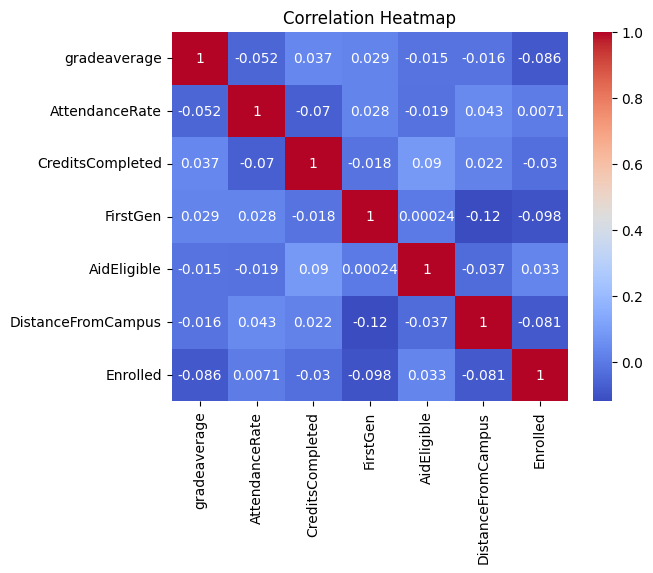

In [ ]:
df.info()
df.describe()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('Enrolled', axis=1)
y = df['Enrolled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

Accuracy: 0.42

Classification Report:
               precision    recall  f1-score   support

           0       0.42      1.00      0.59        42
           1       0.00      0.00      0.00        58

    accuracy                           0.42       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.42      0.25       100



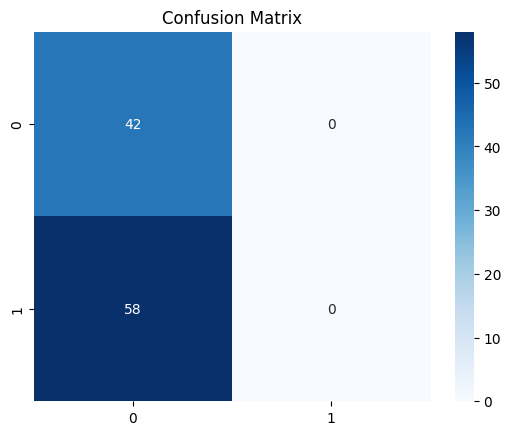

In [ ]:
y_pred = model.predict(X_test_scaled if 'scaled' in vars() else X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

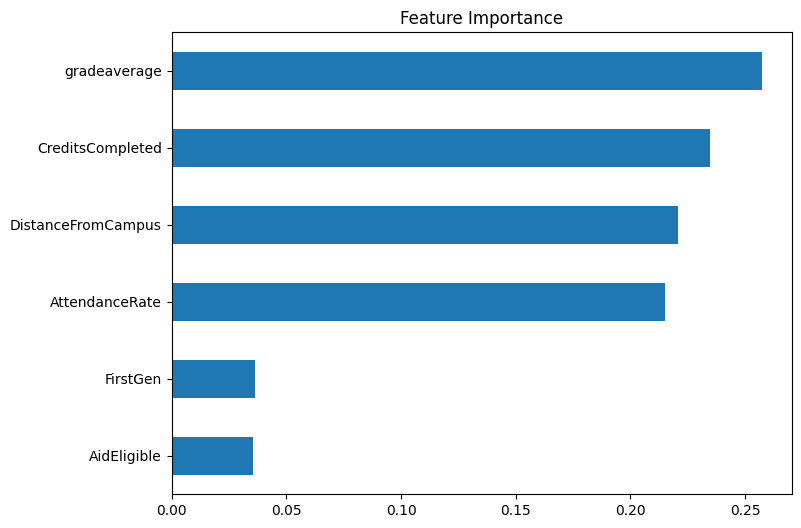

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()

/tmp/ipython-input-4089997475.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


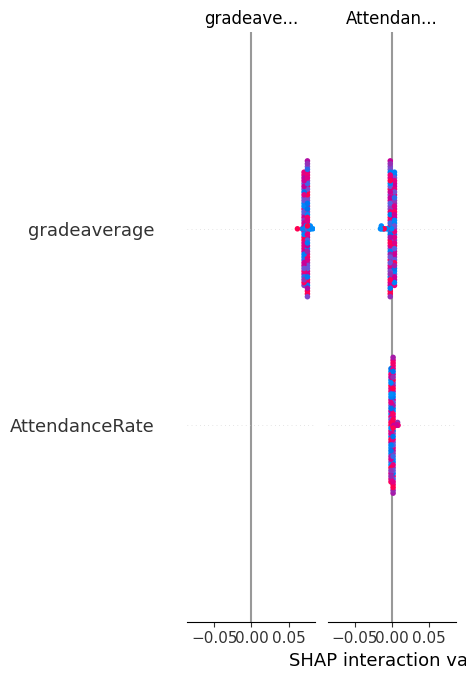

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
import joblib
joblib.dump(model, "enrollment_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model saved.")

Model saved.
